In [3]:
import matplotlib.pyplot as plt

from chainercv.datasets import voc_bbox_label_names
from chainercv.links import SSD300
from chainercv.links import FasterRCNNVGG16
from chainercv.links.model.faster_rcnn import FasterRCNN
from chainercv.utils import read_image
from chainercv.visualizations import vis_bbox

from PIL import Image 
import cv2 as cv
import numpy as np  
from tqdm import tqdm
import os

import glob

In [4]:
def make_dir(dir_name):
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

In [5]:
def cut(img):
    """
    OpenCV GrabCut algorithm
    
    """

    img = cv.resize(img,(224,224))
    
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    height, width = img.shape[:2]
    
    #creating a window for the extraction
    #fine tune to narrow or extend the roi
    rect = (25,30,width-25,height-10)
    
    cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,
               cv.GC_INIT_WITH_RECT)
    
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img2 = img*mask2[:,:,np.newaxis]
    
    #set black background 
    img2[mask2 == 2] = (255, 255, 255)
    
    final = np.ones(img.shape,np.uint8) * 0 + img2
    
    return mask, final

In [7]:
def predict(img_path):
    """
    model used : SSD or Faster RCNN
    returns bounding box co-ordinates. 
    
    """
    
    # Read an RGB image and return it in CHW format.
    img = read_image(img_path)
    
#     model = SSD300(pretrained_model='voc0712')
    model = FasterRCNNVGG16(n_fg_class = len(voc_bbox_label_names), pretrained_model='voc0712')
    bboxes, labels, scores = model.predict([img])
    
    # taking predictions with max scores
    try:
        #check for validating people inside the bounding box
        is_person = labels[0][np.argmax(scores)] 
        
        if voc_bbox_label_names[is_person] == 'person':

            bb = bboxes[0][np.argmax(scores)]
            
        else: # if max score doesnt belong to person class
            next_person_index = next((np.where(labels[0] == l) for l in labels[0] if l == 14))
            bb = bboxes[0][next_person_index]
            bb = bb[0]
            
        return bb
    
    except:
        print("Empty Prediction Array")


        
        
        
    

In [16]:
def extract(img_path):
    """
    arguments: img_path -> str: absolute path of the image
    
    """
    try:
        #get bounding box co-ordinates
        
        bb = predict(img_path)
        top = bb[0]
        left = bb[1]
        bottom = bb[2]
        right = bb[3]

        im = Image.open(img_path)

        #crop the original images based on bounding box
        im1 = im.crop((left, top, right, bottom))

        #creates new directory if it doesnt exist.
        make_dir('cropped_images')

        crop_fn = f'cropped_images/crop_' + img_path.split('/')[-1]
        im1.save(crop_fn, "JPEG")

        #resizing the cropped image
        original = cv.imread(crop_fn)
        original = cv.resize(original,(224,224))

        #GrabCut Algorithm
        mask, final = cut(original)

        #creates new directory if it doesnt exist.
        make_dir('extracted_images')

        ext_fn = f'extracted_images/ext_' + img_path.split('/')[-1]

        #plot the output
        plt.figure(figsize=(16,8))
        plt.subplot(1,3,1)
        plt.imshow(cv.cvtColor(original, cv.COLOR_BGRA2RGB))
        plt.subplot(1,3,2)
        plt.imshow(cv.cvtColor(final, cv.COLOR_BGRA2RGB))
        plt.imsave(ext_fn,cv.cvtColor(final, cv.COLOR_BGRA2RGB))
    except:
        pass



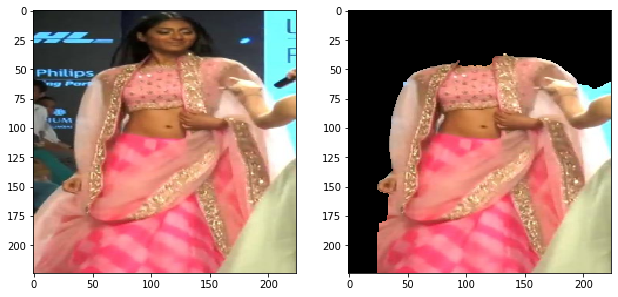

In [17]:
extract('2/1163.0.jpeg')

In [39]:
extract('2/4038.0.jpeg')

Empty Prediction Array




  0%|          | 0/48 [00:00<?, ?it/s]

2/3513.0.jpeg




  2%|▏         | 1/48 [00:16<12:49, 16.38s/it]

2/4145.0.jpeg




  4%|▍         | 2/48 [00:32<12:24, 16.19s/it]

2/4038.0.jpeg




  6%|▋         | 3/48 [00:46<11:43, 15.63s/it]

Empty Prediction Array
2/503.0.jpeg




  8%|▊         | 4/48 [01:02<11:33, 15.76s/it]

2/1536.0.jpeg




 10%|█         | 5/48 [01:19<11:28, 16.02s/it]

2/4034.0.jpeg




 12%|█▎        | 6/48 [01:33<10:53, 15.56s/it]

Empty Prediction Array
2/3842.0.jpeg




 15%|█▍        | 7/48 [01:49<10:40, 15.63s/it]

2/5264.0.jpeg




 17%|█▋        | 8/48 [02:05<10:29, 15.74s/it]

2/4946.0.jpeg




 19%|█▉        | 9/48 [02:21<10:16, 15.80s/it]

2/1189.0.jpeg




 21%|██        | 10/48 [02:37<10:05, 15.92s/it]

2/6324.0.jpeg




 23%|██▎       | 11/48 [02:52<09:41, 15.72s/it]

2/3069.0.jpeg




 25%|██▌       | 12/48 [03:07<09:17, 15.48s/it]

2/1160.0.jpeg




 27%|██▋       | 13/48 [03:23<09:06, 15.61s/it]

2/3237.0.jpeg




 29%|██▉       | 14/48 [03:39<08:57, 15.79s/it]

2/2876.0.jpeg




 31%|███▏      | 15/48 [03:55<08:36, 15.67s/it]

2/667.0.jpeg




 33%|███▎      | 16/48 [04:11<08:27, 15.86s/it]

2/1247.0.jpeg




 35%|███▌      | 17/48 [04:25<07:57, 15.40s/it]

Empty Prediction Array
2/1193.0.jpeg




 38%|███▊      | 18/48 [04:41<07:46, 15.56s/it]

2/2319.0.jpeg




 40%|███▉      | 19/48 [04:57<07:34, 15.67s/it]

2/3102.0.jpeg




 42%|████▏     | 20/48 [05:13<07:15, 15.55s/it]

2/3653.0.jpeg




 44%|████▍     | 21/48 [05:29<07:03, 15.70s/it]

2/4942.0.jpeg




 46%|████▌     | 22/48 [05:45<06:50, 15.81s/it]

2/1236.0.jpeg




 48%|████▊     | 23/48 [06:00<06:28, 15.55s/it]

2/1890.0.jpeg




 50%|█████     | 24/48 [06:16<06:19, 15.83s/it]

2/468.0.jpeg




 52%|█████▏    | 25/48 [06:32<06:06, 15.93s/it]

2/6316.0.jpeg




 54%|█████▍    | 26/48 [06:48<05:49, 15.88s/it]

2/4141.0.jpeg




 56%|█████▋    | 27/48 [07:03<05:31, 15.78s/it]

2/3126.0.jpeg




 58%|█████▊    | 28/48 [07:19<05:14, 15.72s/it]

2/5370.0.jpeg




 60%|██████    | 29/48 [07:35<05:00, 15.81s/it]

2/1345.0.jpeg




 62%|██████▎   | 30/48 [07:51<04:46, 15.91s/it]

2/3159.0.jpeg




 65%|██████▍   | 31/48 [08:07<04:29, 15.86s/it]

2/3124.0.jpeg




 67%|██████▋   | 32/48 [08:23<04:13, 15.87s/it]

2/2513.0.jpeg




 69%|██████▉   | 33/48 [08:38<03:56, 15.77s/it]

2/3155.0.jpeg




 71%|███████   | 34/48 [08:54<03:38, 15.64s/it]

2/3679.0.jpeg




 73%|███████▎  | 35/48 [09:09<03:21, 15.50s/it]

2/3667.0.jpeg




 75%|███████▌  | 36/48 [09:24<03:06, 15.50s/it]

2/383.0.jpeg




 77%|███████▋  | 37/48 [09:40<02:52, 15.66s/it]

2/2909.0.jpeg




 79%|███████▉  | 38/48 [09:56<02:36, 15.64s/it]

2/1650.0.jpeg




 81%|████████▏ | 39/48 [10:12<02:21, 15.74s/it]

2/1633.0.jpeg




 83%|████████▎ | 40/48 [10:28<02:06, 15.78s/it]

2/6105.0.jpeg




 85%|████████▌ | 41/48 [10:44<01:50, 15.79s/it]

2/4194.0.jpeg




 88%|████████▊ | 42/48 [11:00<01:35, 15.85s/it]

2/1621.0.jpeg




 90%|████████▉ | 43/48 [11:16<01:19, 15.88s/it]

2/1146.0.jpeg




 92%|█████████▏| 44/48 [11:32<01:03, 15.92s/it]

2/2491.0.jpeg




 94%|█████████▍| 45/48 [11:47<00:47, 15.80s/it]

2/3786.0.jpeg




 96%|█████████▌| 46/48 [12:03<00:31, 15.86s/it]

2/4448.0.jpeg




 98%|█████████▊| 47/48 [12:19<00:15, 15.75s/it]

2/4897.0.jpeg




100%|██████████| 48/48 [12:35<00:00, 15.73s/it]


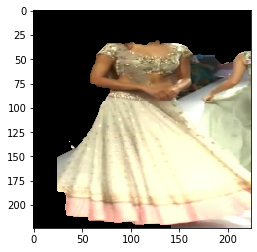

In [40]:
for i in tqdm(glob.glob("2/*.jpeg")):
#     print(i)
    extract(i)